# 多股票分析

本notebook演示如何分析多只股票，包括价格对比、相关性分析、风险收益分析等。

**注意**: 由于Yahoo Finance API限流，本notebook使用已创建的示例数据。

## 1. 导入必要的库

In [ ]:
import sys
import os
notebook_dir = os.getcwd()
project_dir = os.path.dirname(notebook_dir)
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loader import load_multiple_stocks
from src.multi_stock_analysis import (
    create_price_dataframe,
    normalize_prices,
    plot_multi_stock_prices,
    calculate_returns_correlation,
    plot_correlation_heatmap,
    calculate_stock_metrics,
    plot_returns_comparison,
    plot_risk_return_scatter,
    compare_performance,
    find_best_performer,
    find_worst_performer
)

plt.rcParams["font.family"] = ["PingFang SC", "Heiti TC", "SimHei", "Arial Unicode MS", "sans-serif"]
plt.rcParams['axes.unicode_minus'] = False
print("库导入成功！")
print(f"项目目录: {project_dir}")

库导入成功！
项目目录: /Users/fang/Documents/Code/python-demo/stock-analysis


## 2. 定义要分析的股票

In [ ]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
print(f"将要分析的股票: {', '.join(tickers)}")

将要分析的股票: AAPL, MSFT, GOOGL, AMZN, TSLA


## 3. 加载多只股票数据

In [ ]:
stock_data = load_multiple_stocks(
    tickers=tickers,
    data_dir=os.path.join(project_dir, 'data'),
    period='5y',
    force_download=False
)

print(f"成功加载 {len(stock_data)} 只股票的数据")
for ticker, data in stock_data.items():
    print(f"  {ticker}: {len(data)} 行数据")

从本地文件加载数据: /Users/fang/Documents/Code/python-demo/stock-analysis/data/AAPL_stock_data.csv
从本地文件加载数据: /Users/fang/Documents/Code/python-demo/stock-analysis/data/MSFT_stock_data.csv
从本地文件加载数据: /Users/fang/Documents/Code/python-demo/stock-analysis/data/GOOGL_stock_data.csv
从本地文件加载数据: /Users/fang/Documents/Code/python-demo/stock-analysis/data/AMZN_stock_data.csv
从本地文件加载数据: /Users/fang/Documents/Code/python-demo/stock-analysis/data/TSLA_stock_data.csv
成功加载 5 只股票的数据
  AAPL: 1304 行数据
  MSFT: 1304 行数据
  GOOGL: 1304 行数据
  AMZN: 1304 行数据
  TSLA: 1304 行数据


## 4. 创建价格DataFrame

In [ ]:
price_df = create_price_dataframe(stock_data, 'Close')
print(f"价格DataFrame形状: {price_df.shape}")
print(f"\n价格数据预览:")
price_df.head()

价格DataFrame形状: (6516, 5)

价格数据预览:


,AAPL,MSFT,GOOGL,AMZN,TSLA
Date,,,,,
2021-01-04 23:19:25.695175,261.00,258.00,215.00,234.00,135.0
2021-01-05 23:19:25.658854,263.91,258.00,215.00,234.00,135.0
2021-01-05 23:19:25.669733,263.91,260.18,215.00,234.00,135.0
2021-01-05 23:19:25.678417,263.91,260.18,214.25,234.00,135.0
2021-01-05 23:19:25.686770,263.91,260.18,214.25,233.31,135.0


## 5. 标准化价格（起始点=100）

In [ ]:
normalized_prices = normalize_prices(price_df)
print(f"标准化价格DataFrame形状: {normalized_prices.shape}")
print(f"\n标准化价格预览:")
normalized_prices.head()

标准化价格DataFrame形状: (6516, 5)

标准化价格预览:


,AAPL,MSFT,GOOGL,AMZN,TSLA
Date,,,,,
2021-01-04 23:19:25.695175,100.000000,100.000000,100.000000,100.000000,100.0
2021-01-05 23:19:25.658854,101.114943,100.000000,100.000000,100.000000,100.0
2021-01-05 23:19:25.669733,101.114943,100.844961,100.000000,100.000000,100.0
2021-01-05 23:19:25.678417,101.114943,100.844961,99.651163,100.000000,100.0
2021-01-05 23:19:25.686770,101.114943,100.844961,99.651163,99.705128,100.0


## 6. 绘制多股票价格走势对比

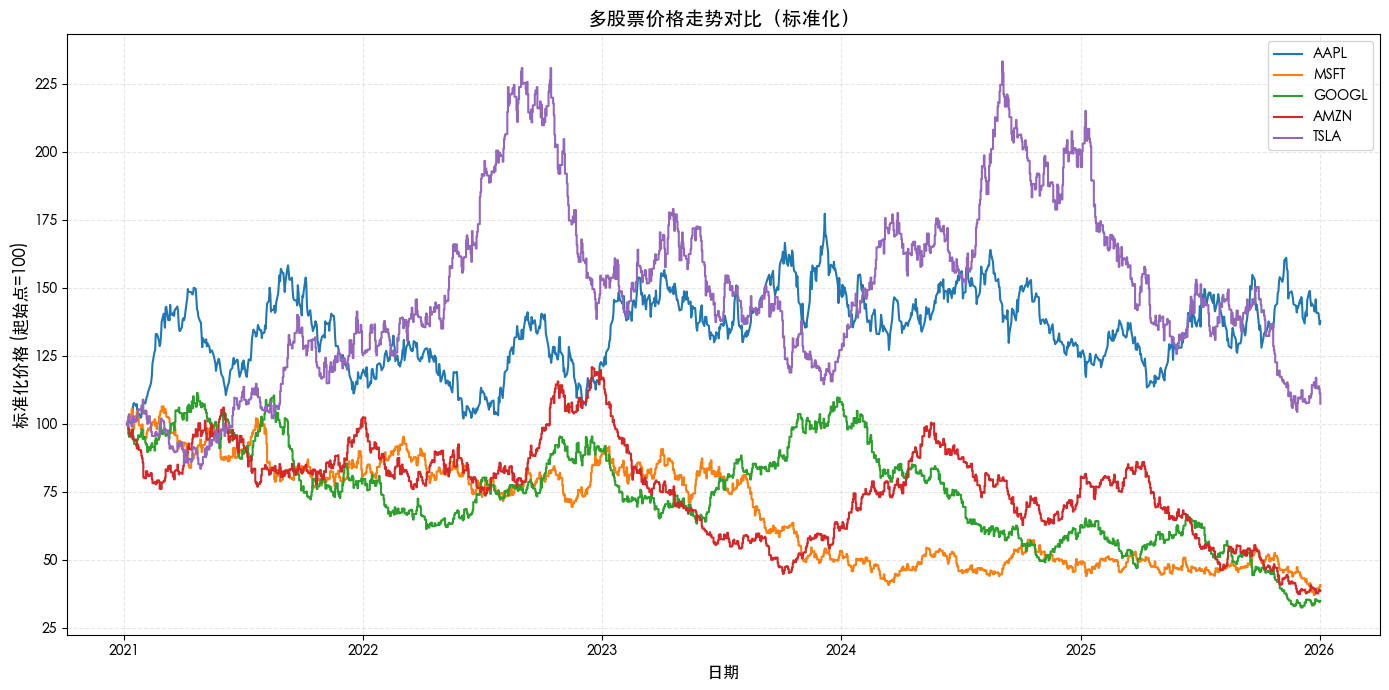

In [ ]:
plot_multi_stock_prices(
    stock_data,
    column='Close',
    normalize=True,
    title='多股票价格走势对比（标准化）',
    figsize=(14, 7)
)

## 7. 计算收益率相关性

In [ ]:
corr_matrix = calculate_returns_correlation(stock_data, 'Close')
print("收益率相关性矩阵:")
print(corr_matrix.round(3))

收益率相关性矩阵:
       AAPL  MSFT  GOOGL  AMZN  TSLA
AAPL    1.0   0.0    0.0   0.0  -0.0
MSFT    0.0   1.0   -0.0  -0.0   0.0
GOOGL   0.0  -0.0    1.0  -0.0   0.0
AMZN    0.0  -0.0   -0.0   1.0   0.0
TSLA   -0.0   0.0    0.0   0.0   1.0


## 8. 绘制相关性热力图

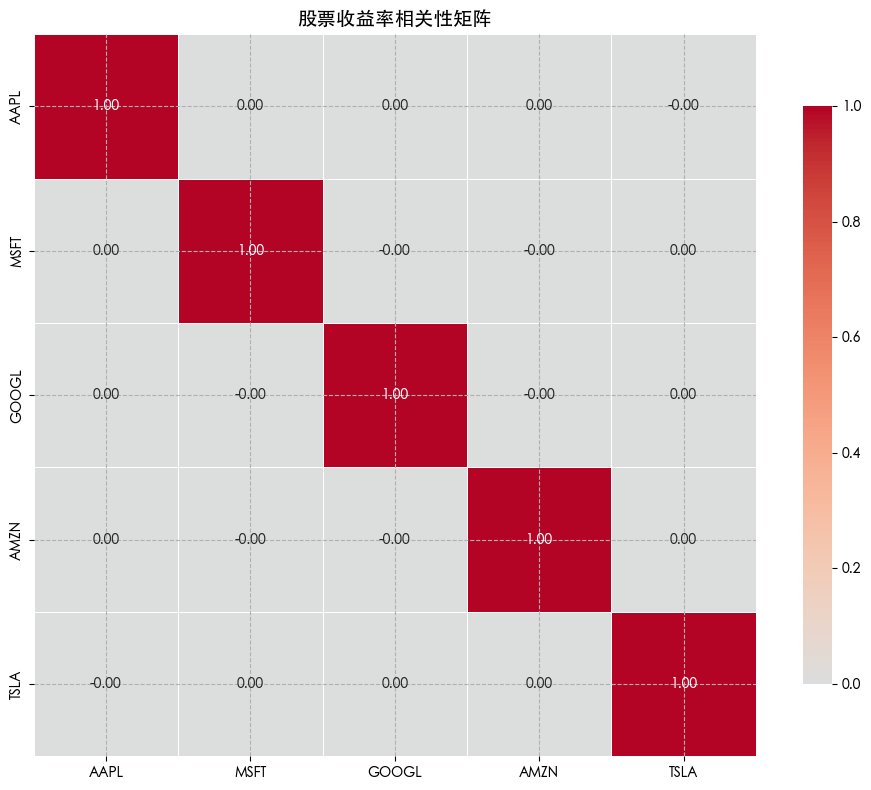

In [ ]:
plot_correlation_heatmap(
    stock_data,
    column='Close',
    title='股票收益率相关性矩阵',
    figsize=(10, 8)
)

## 9. 计算各股票指标

In [ ]:
metrics_df = calculate_stock_metrics(stock_data, 'Close')
print("各股票指标:")
print(metrics_df.round(2))

各股票指标:
        Start_Price  End_Price  Total_Return_Pct  Mean_Return_Pct  \
Ticker                                                              
AAPL          261.0     359.38             37.69             0.04   
MSFT          258.0     105.59            -59.07            -0.05   
GOOGL         215.0      75.35            -64.95            -0.06   
AMZN          234.0      90.78            -61.21            -0.05   
TSLA          135.0     145.10              7.48             0.03   

        Std_Return_Pct  Max_Drawdown_Pct  Sharpe_Ratio  Volatility_Annual  
Ticker                                                                     
AAPL              1.99             63.77          0.35              31.59  
MSFT              1.96             69.28         -0.40              31.11  
GOOGL             2.00             78.78         -0.48              31.80  
AMZN              2.02             83.33         -0.41              32.12  
TSLA              2.02            128.62          0.2

## 10. 绘制收益率对比

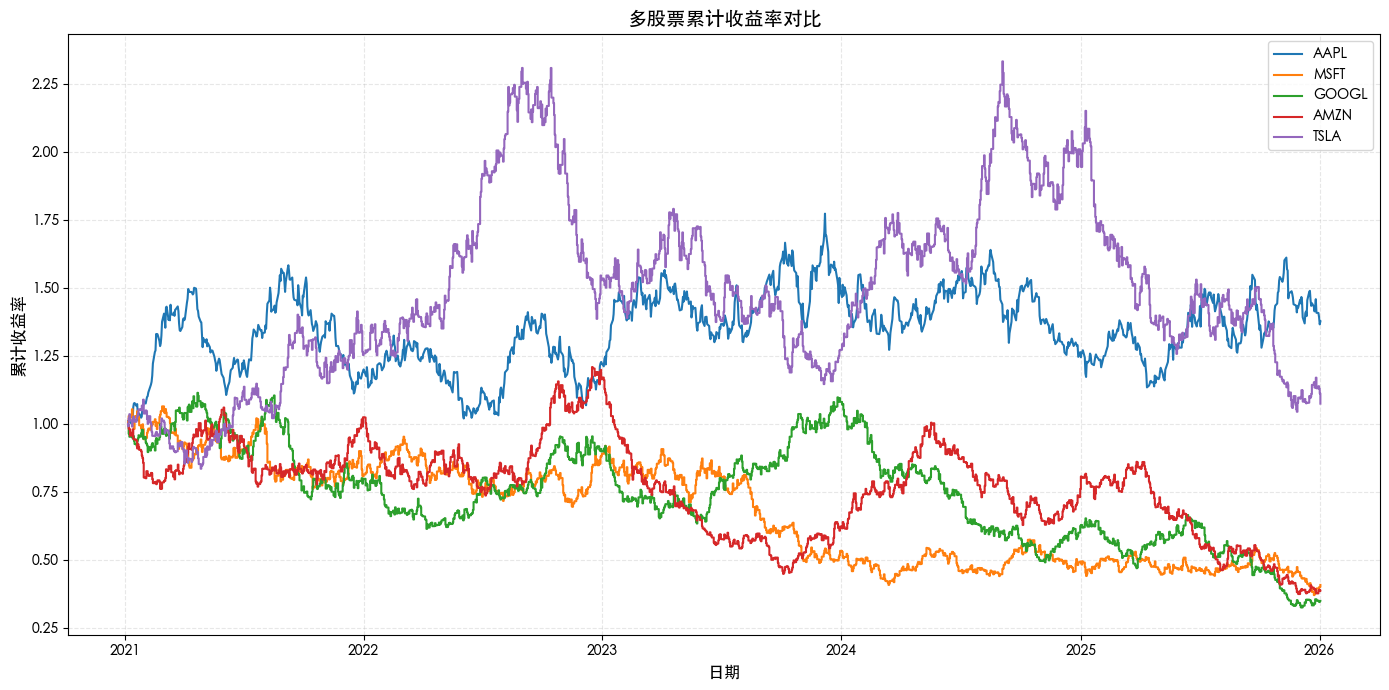

In [ ]:
plot_returns_comparison(
    stock_data,
    column='Close',
    title='多股票累计收益率对比',
    figsize=(14, 7)
)

## 11. 绘制风险-收益散点图

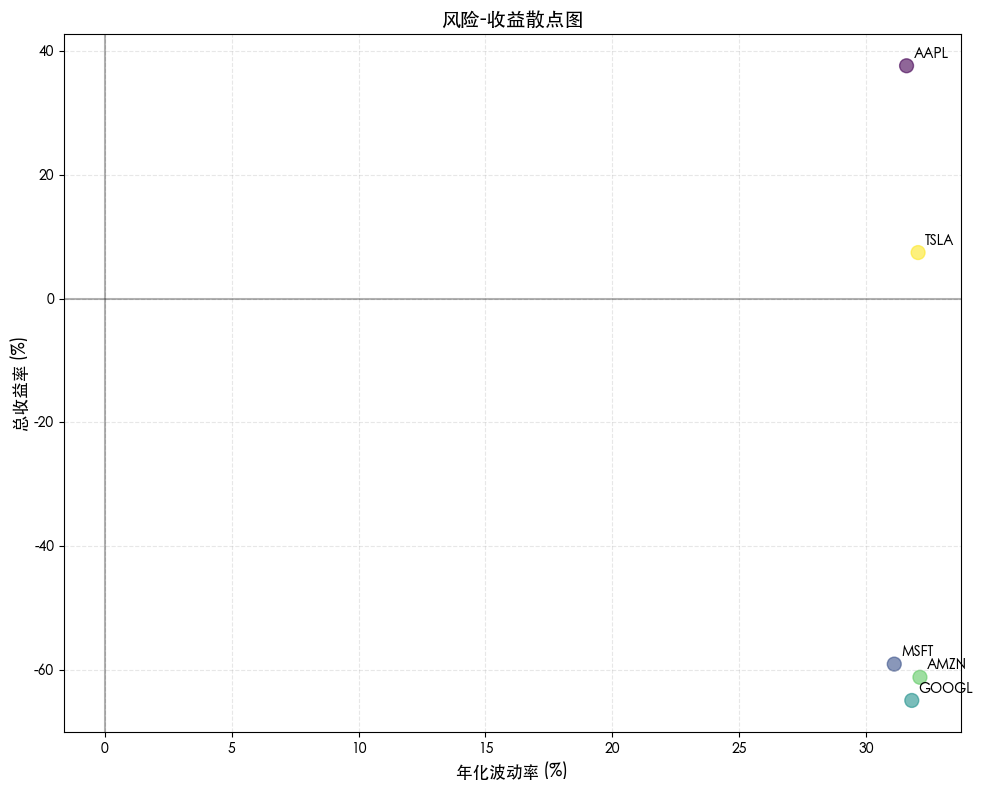

In [ ]:
plot_risk_return_scatter(
    stock_data,
    column='Close',
    title='风险-收益散点图',
    figsize=(10, 8)
)

## 12. 找出最佳和最差表现股票

In [ ]:
best_ticker, best_return = find_best_performer(stock_data, 'Close', 'Total_Return_Pct')
worst_ticker, worst_return = find_worst_performer(stock_data, 'Close', 'Total_Return_Pct')

print(f"最佳表现股票: {best_ticker} (收益率: {best_return:.2f}%)")
print(f"最差表现股票: {worst_ticker} (收益率: {worst_return:.2f}%)")

最佳表现股票: AAPL (收益率: 37.69%)
最差表现股票: GOOGL (收益率: -64.95%)


## 13. 按不同指标排名

In [ ]:
print("按总收益率排名:")
print(metrics_df['Total_Return_Pct'].sort_values(ascending=False).round(2))

print(f"\n按夏普比率排名:")
print(metrics_df['Sharpe_Ratio'].sort_values(ascending=False).round(2))

print(f"\n按波动率排名（从低到高）:")
print(metrics_df['Volatility_Annual'].sort_values().round(2))

按总收益率排名:
Ticker
AAPL     37.69
TSLA      7.48
MSFT    -59.07
AMZN    -61.21
GOOGL   -64.95
Name: Total_Return_Pct, dtype: float64

按夏普比率排名:
Ticker
AAPL     0.35
TSLA     0.20
MSFT    -0.40
AMZN    -0.41
GOOGL   -0.48
Name: Sharpe_Ratio, dtype: float64

按波动率排名（从低到高）:
Ticker
MSFT     31.11
AAPL     31.59
GOOGL    31.80
TSLA     32.05
AMZN     32.12
Name: Volatility_Annual, dtype: float64


## 14. 综合对比分析

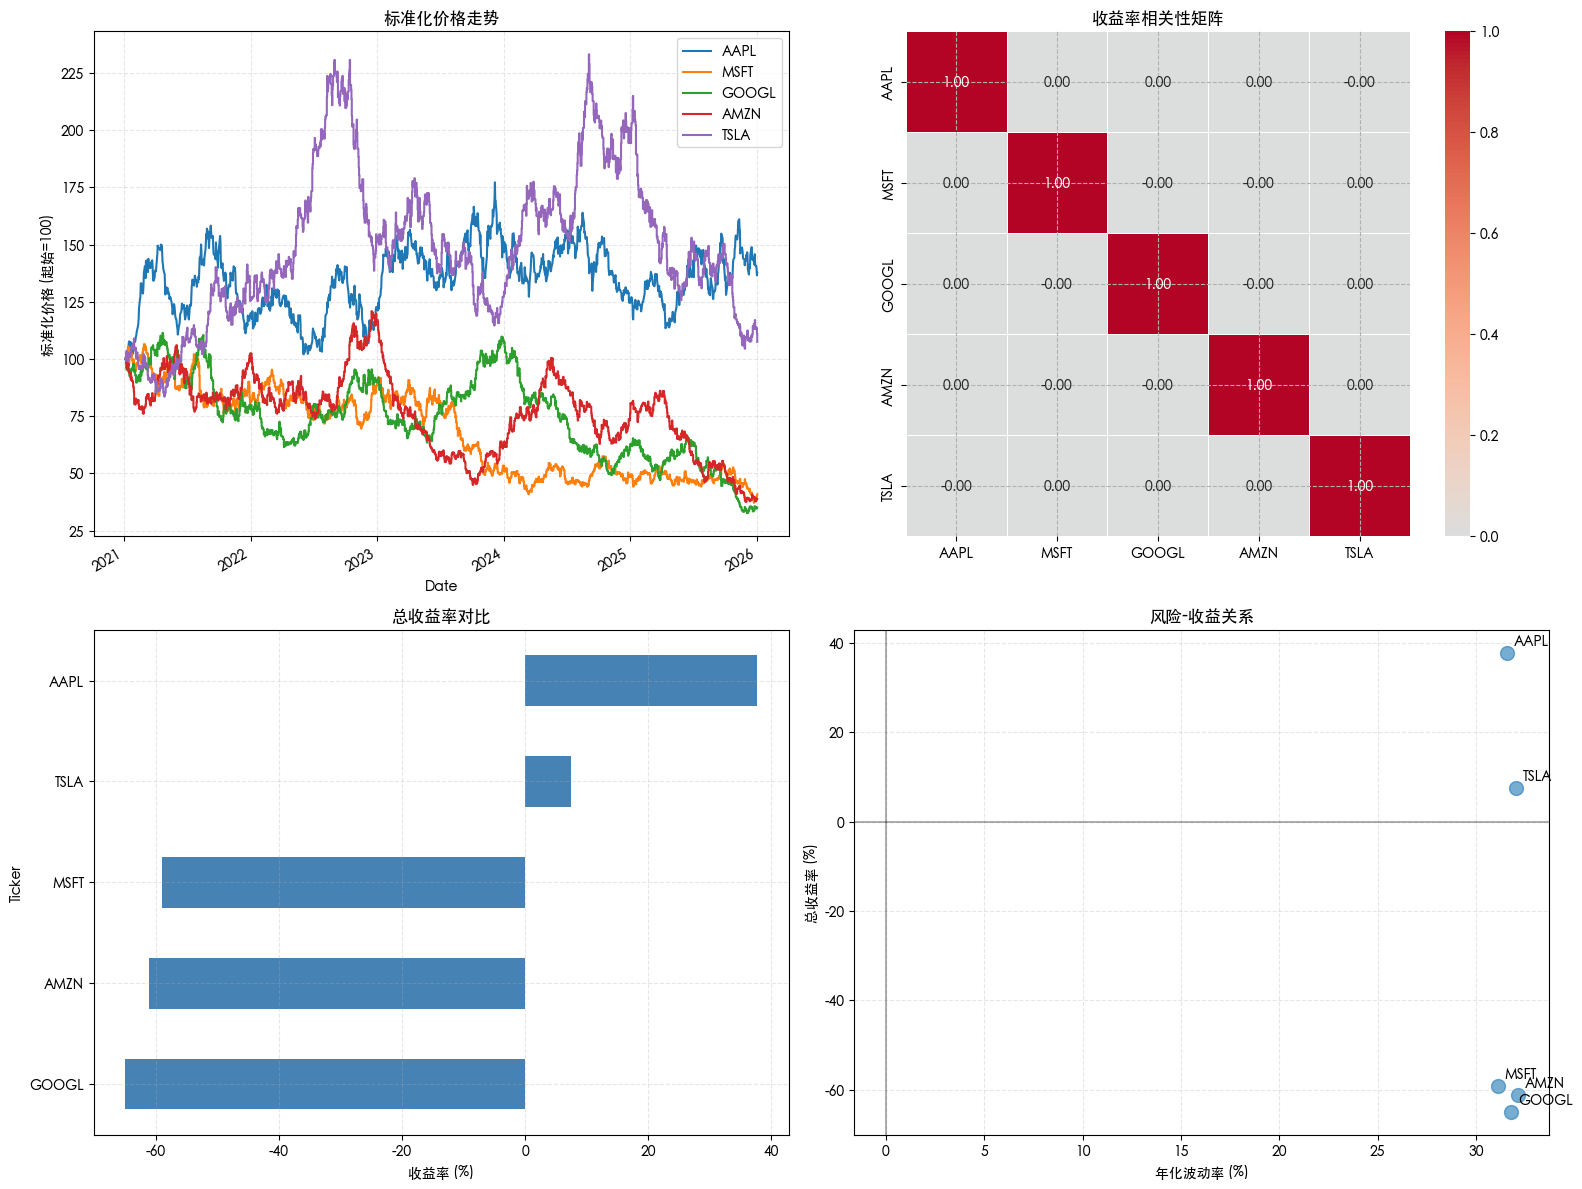

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

normalized_prices.plot(ax=axes[0, 0], linewidth=1.5)
axes[0, 0].set_title('标准化价格走势')
axes[0, 0].set_ylabel('标准化价格 (起始=100)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, ax=axes[0, 1], fmt='.2f')
axes[0, 1].set_title('收益率相关性矩阵')

metrics_df['Total_Return_Pct'].sort_values().plot(kind='barh', ax=axes[1, 0], color='steelblue')
axes[1, 0].set_title('总收益率对比')
axes[1, 0].set_xlabel('收益率 (%)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(metrics_df['Volatility_Annual'], metrics_df['Total_Return_Pct'], s=100, alpha=0.6)
for i, ticker in enumerate(metrics_df.index):
    axes[1, 1].annotate(ticker, (metrics_df['Volatility_Annual'].iloc[i], 
                           metrics_df['Total_Return_Pct'].iloc[i]),
                       xytext=(5, 5), textcoords='offset points')
axes[1, 1].set_xlabel('年化波动率 (%)')
axes[1, 1].set_ylabel('总收益率 (%)')
axes[1, 1].set_title('风险-收益关系')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

## 15. 保存分析结果

In [ ]:
metrics_df.to_csv(os.path.join(project_dir, 'data', 'multi_stock_metrics.csv'))
print("多股票指标已保存至: data/multi_stock_metrics.csv")

normalized_prices.to_csv(os.path.join(project_dir, 'data', 'normalized_prices.csv'))
print("标准化价格已保存至: data/normalized_prices.csv")

多股票指标已保存至: data/multi_stock_metrics.csv
标准化价格已保存至: data/normalized_prices.csv


## 16. 总结

本notebook完成了以下任务：
1. ✓ 加载多只股票数据
2. ✓ 创建价格DataFrame
3. ✓ 标准化价格数据
4. ✓ 绘制多股票价格走势对比
5. ✓ 计算收益率相关性
6. ✓ 绘制相关性热力图
7. ✓ 计算各股票指标
8. ✓ 绘制收益率对比
9. ✓ 绘制风险-收益散点图
10. ✓ 找出最佳和最差表现股票
11. ✓ 按不同指标排名
12. ✓ 综合对比分析
13. ✓ 保存分析结果

下一步：在下一个notebook中学习如何生成分析报告。